# Idan Chen project - Personal Key Indicators of Heart Disease

![logo](logo.png)

#### imports

In [77]:
# basic imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# settings immports
pd.options.display.max_columns = 40
# COLOR = 'white'
# plt.rcParams['text.color'] = COLOR
# plt.rcParams['axes.labelcolor'] = COLOR
# plt.rcParams['xtick.color'] = COLOR
# plt.rcParams['ytick.color'] = COLOR

# Unbalance data imports
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# ML imports
from sklearn.model_selection import train_test_split
import sklearn.metrics as met

# configurations imports -> don't forget it Igal :)
%config Completer.use_jedi = False

## load the data and show basic information

In [78]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [79]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [83]:
df.isna().sum().sum()

0

In [84]:
df.HeartDisease.value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

## Basic visualisations for analysis

#### histplot of SleepTime devided to 24 bins (number of hours per day)

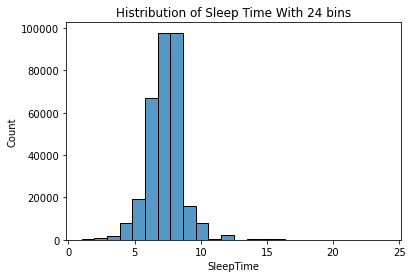

In [85]:
ax = sns.histplot(data=df,x='SleepTime',bins=24)
_ = ax.set_title("Histribution of Sleep Time With 24 bins")

#### histplot of BMI devided to 100 bins

<AxesSubplot:xlabel='BMI', ylabel='Count'>

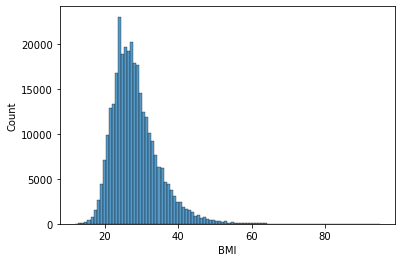

In [86]:
sns.histplot(data=df,x='BMI',bins=100)

#### Function that get df and column name and plot countplot with bar labels

In [87]:
def create_count_plot(x_size,y_size, df, column_name):
    fig = plt.figure(figsize=(x_size,y_size))
    plt.title(column_name,fontsize=15)
    ax = sns.countplot(x=df[column_name],
                       order=df[column_name].value_counts(ascending=False).index);
    abs_values = df[column_name].value_counts(ascending=False).values
    _ = ax.bar_label(container=ax.containers[0], labels=abs_values)

#### count plot of Age Category

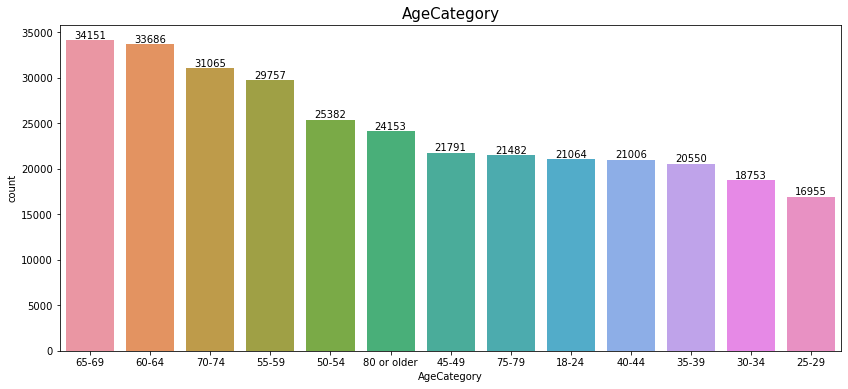

In [88]:
create_count_plot(x_size= 14, y_size = 6,df=df, column_name="AgeCategory")

#### count plot of Heart Disease

In [150]:
ax= df["HeartDisease"].value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Pie of Heart Disease")

KeyError: 'HeartDisease'

In [ ]:
sns.pairplot(hue = 'HeartDisease',data=df,plot_kws={'alpha':0.75})

#### count plot of Age Category

## Data Preparation 

###  Balance the data

In [89]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('HeartDisease',axis=1), df['HeartDisease'], test_size=0.33, random_state=42)

In [152]:
Counter(y_train)

Counter({'No': 196037, 'Yes': 18225})

In [91]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [92]:
Counter(y_rus)

Counter({'No': 18225, 'Yes': 18225})

In [93]:
df =  pd.concat([X_rus,y_rus],axis=1)

## Find the best columns for ML on HeartDisease based on their Corr

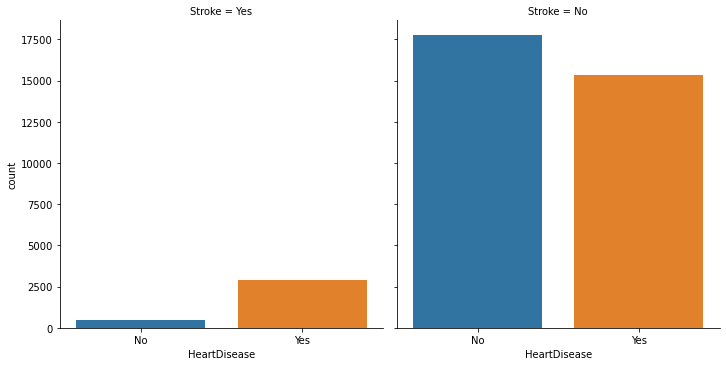

In [141]:
sns.catplot(x='HeartDisease',data=df,col='Stroke',kind='count')

### After Reaserch by using catplot and pandas corr I Found the suits colums are:
- Smoking   
- Stroke
- PhysicalHealth
- DiffWalking
- Sex
- AgeCategory
- Diabetic
- PhysicalActivity	
- GenHealth

In [142]:
df = df[["Smoking","Stroke","PhysicalHealth","DiffWalking","Sex","AgeCategory","Diabetic","PhysicalActivity","GenHealth","HeartDisease"]]

In [143]:
df.head(1)

,Smoking,Stroke,PhysicalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,HeartDisease
0,No,Yes,14.0,Yes,Female,55-59,No,No,Fair,No


###  Dummy variables for categorical variables

In [144]:
lst_of_dummy_variables = ['HeartDisease','Smoking','Stroke','DiffWalking','Sex','AgeCategory','Diabetic','PhysicalActivity','GenHealth']

In [145]:
df = pd.get_dummies(data=df,columns=lst_of_dummy_variables,drop_first=True)

### see the data after the Preparation

In [146]:
df.head(1)

,PhysicalHealth,HeartDisease_Yes,Smoking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,AgeCategory_70-74,AgeCategory_75-79,AgeCategory_80 or older,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,14.0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


## Model Training

## SUMMARY

# Finish!

In [ ]:
for i in range(1,9):
    c = itertools.combinations('ABCDEFGI',i)
    for item in c:
#         print(item)
#         print(list(item))
        X_train, X_test, y_train, y_test = sm.train_test_split(
                df[list(item)], 
                df.Target, 
                test_size=0.33, 
                random_state=101)
        model = sl.LinearRegression()
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        if score > 0.95:
            print(list(item), score)